In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

## Part 1: Means and medians ##

In [2]:
# Load the flight delay data
flights = Table.read_table('united.csv')
flights

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


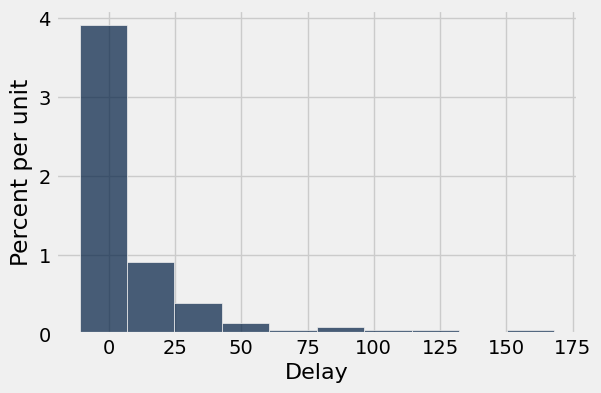

In [3]:
# Now look at a particular day only:
flights = flights.where('Date', '8/1/15')
flights.hist('Delay')

In [4]:
flights.sort('Delay').show()

Date,Flight Number,Destination,Delay
8/1/15,497,SLC,-11
8/1/15,824,JFK,-10
8/1/15,229,IAH,-9
8/1/15,1749,OGG,-9
8/1/15,355,IAH,-7
8/1/15,1168,EWR,-7
8/1/15,276,EWR,-6
8/1/15,277,SNA,-6
8/1/15,384,PHL,-6
8/1/15,478,LAX,-6


In [5]:
print('Median:  ', np.median(flights.column('Delay')))
print('Average: ', np.average(flights.column('Delay')))

Median:   1.0
Average:  9.36923076923


In [5]:
delays = flights.column('Delay')

# Now let's assume that a plane disappears for 5.5 
# years as in the show Manifest:
delays[-1] = 2890800

print('New median:  ', np.median(delays))
print('New average: ', np.average(delays))

New median:   1.0
New average:  22246.1461538


## Part 2: Standard deviations ##

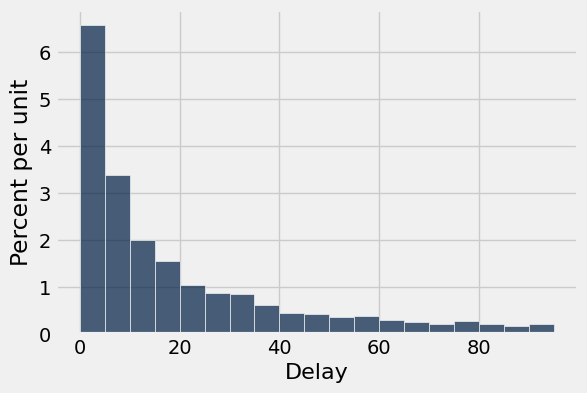

In [6]:
# Generate the histogram of the flight data. Start
# by reloading the entire data table, since we 
# altered it in the last part.

flights = Table.read_table('united.csv')
flights.hist('Delay', bins = np.arange(0, 100, 5))

In [7]:
# Calculate the mean and the standard deviation:
mean = np.mean(flights.column('Delay'))
std = np.std(flights.column('Delay'))

print('Average delay: ', mean)
print('Standard dev:  ', std)

Average delay:  16.6581555154
Standard dev:   39.4801998516


In [8]:
# For a few standard deviations: display how many
# flights are within that many standard deviations
# of the mean.

for z in range(1, 6):
    fraction = flights.where('Delay', are.below(mean + z * std)).num_rows / flights.num_rows
    print(f'Percentage within {z} SDs of the mean: {100*fraction:.2f}%')

Percentage within 1 SDs of the mean: 90.34%
Percentage within 2 SDs of the mean: 95.61%
Percentage within 3 SDs of the mean: 97.90%
Percentage within 4 SDs of the mean: 98.76%
Percentage within 5 SDs of the mean: 99.33%


## Part 3: Another distribution! ##

In [11]:
weather = Table.read_table('merced_weather_2024_september.csv')
weather

Date,Maximum Temperature,Minimum Temperature,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
2024-09-01,97,64,nan,nan,nan,nan,nan,nan,nan
2024-09-02,94,62,nan,nan,nan,nan,nan,nan,nan
2024-09-03,98,57,nan,nan,nan,nan,nan,nan,nan
2024-09-04,103,62,nan,nan,nan,nan,nan,nan,nan
2024-09-05,104,69,nan,nan,nan,nan,nan,nan,nan
2024-09-06,105,67,nan,nan,nan,nan,nan,nan,nan
2024-09-07,105,66,nan,nan,nan,nan,nan,nan,nan
2024-09-08,105,68,nan,nan,nan,nan,nan,nan,nan
2024-09-09,106,63,nan,nan,nan,nan,nan,nan,nan
2024-09-10,91,61,nan,nan,nan,nan,nan,nan,nan


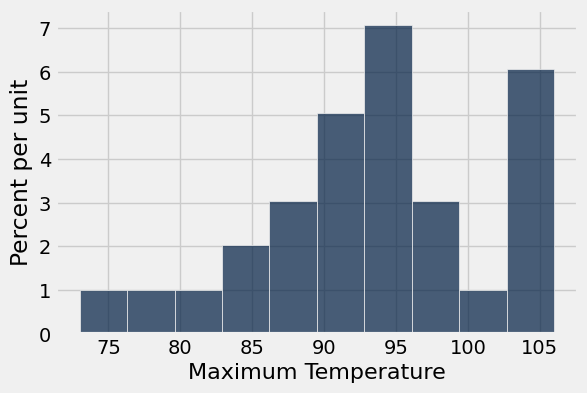

In [12]:
weather.hist('Maximum Temperature')

In [13]:
# Calculate the mean and standard deviation
mean = np.mean(weather.column('Maximum Temperature'))
std = np.std(weather.column('Maximum Temperature'))

print('Mean: ', mean)
print('SD:   ', std)

Mean:  93.3666666667
SD:    8.24007820891


In [14]:
# Count the number of days within a certain number of SDs of the mean:

for z in range(1, 6):
    day_count = weather.where('Maximum Temperature', 
        are.below(mean + z*std)).where('Maximum Temperature',
        are.above(mean - z*std)).num_rows
    print(f'Percentage within {z} SDs: {100*day_count / 30:.2f}%')

Percentage within 1 SDs: 63.33%
Percentage within 2 SDs: 96.67%
Percentage within 3 SDs: 100.00%
Percentage within 4 SDs: 100.00%
Percentage within 5 SDs: 100.00%


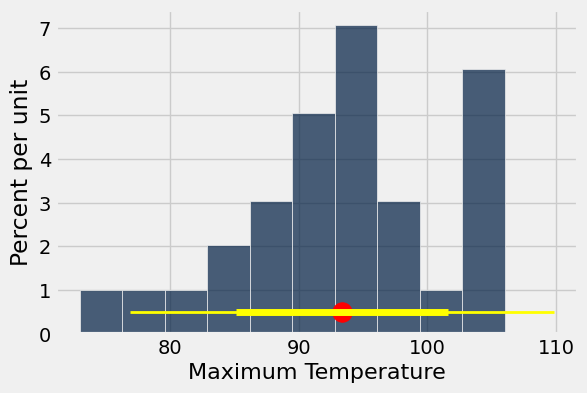

In [15]:
# Make a fancy drawing with one standard deviation:

weather.hist('Maximum Temperature')
plots.scatter(mean, .005, s=200, c='r')
plots.plot([mean-std, mean + std], [0.005, 0.005], 
           color='yellow', lw=5)
plots.plot([mean-2*std, mean + 2*std], [0.005, 0.005], 
           color='yellow', lw=2)